MSE= 0.15555555555555556
intercept_= [4.79326088]
Nº de classes= 2
Classes= {0, 1}


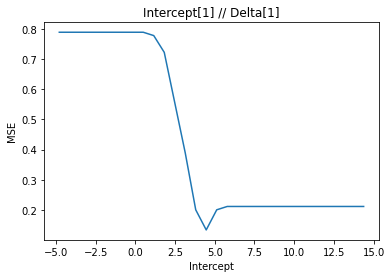

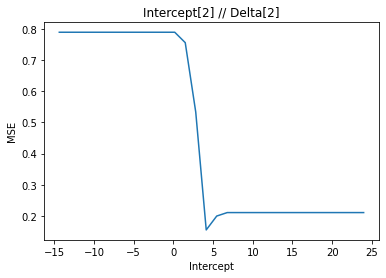

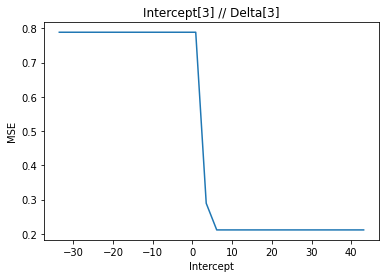

In [8]:
# DESCRIÇÃO DO EXERCÍCIO 03

# Aluno: Wekler Mendes Sarmento

# 1 Carregue uma base de dados de classificação (binária ou multiclasse, mas não multirrótulo) que NÃO esteja nos toy datasets do scikit-learn;

# 2 Treine um modelo da classe LogisticRegression do scikit-learn com toda a base;

# 3 Calcule o MSE (erro quadrático médio) para todos os exemplos da usada como treino no modelo treinado;

# 4 Plote 3 gráficos (2D) o MSE em função do atributo intercept_ da classe LogisticRegression. Mantenha os valores do atributo coef_ fixos e varie o valor de intercept_ entre intercept_ - delta e intercept_ + delta.

#   4.1 Diferentemente da tarefa de regressão, o gráfico do erro da classificação, muito provavelmente, não terá a aparência "bem comportada" que o gráfico do erro da regressão teve. Por isso, você precisará encontrar 3 deltas (um para cada gráfico). Cada delta provavelmente apresentará uma impressão diferente do comportamento da função de erro.
#   4.2 O atributo intercept_ da classe LogisticRegression é um array que guarda o valor de interceptação de cada classe do problema da base de dados. Portanto, será necessário fazer 3 gráficos para cada valor do intercept_. Exemplo: problema com 3 classes, 9 gráficos.

# 5 Suba seu jupyter notebook para o GitHub e disponibilize o link da tarefa (não do repositório).


#==============================================================================================================================================================
# Importando as dependências do código
#==============================================================================================================================================================
# Instalando o pandas para trabalhar com a leitura de arquivos csv (abrir o terminal e instalar o pandaspip install pandas)
# Para leitura de arquivos xlsx precisa-se instalar no computador local o pacote (pip install xlrd openpyxl)
import pandas as pd # Importando a dependêcia para leitura do csv
import numpy as np # Trabalhar com algebra linear
import matplotlib.pyplot as plt #Será utilizado para montar os gráficos
from sklearn.metrics import mean_squared_error #Para calcular o MSE
from sklearn.linear_model import LogisticRegression # Importando o algorítimo de classificação

#==============================================================================================================================================================
#BASE DE DADOS
#==============================================================================================================================================================
# Nome: Immunotherapy Dataset Data Set
    # Descrição da base de dados: https://archive.ics.uci.edu/ml/datasets/Immunotherapy+Dataset
    # Link direto para download da base de dados: https://archive.ics.uci.edu/ml/machine-learning-databases/00428/Immunotherapy.xlsx
    # Nome do arquivo descompactado e utilizado como base de dados: Immunotherapy.xlsx ou direto da internet   
#==============================================================================================================================================================

todos_dados = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00428/Immunotherapy.xlsx') # Lendo o arquivo zip direto da internet


#==============================================================================================================================================================
# Separando os dados X e y
#==============================================================================================================================================================
X, y = todos_dados.drop('Result_of_Treatment', axis=1), todos_dados['Result_of_Treatment']

X = X.to_numpy() # Transformando para array
y = y.to_numpy() # Transformando para array

#==============================================================================================================================================================
# TREINANDO O MODELO E IMPRIMINDO OS VALORES DO mse, intercept e coef
#==============================================================================================================================================================
modelo = LogisticRegression() #Criando o modelo

modelo.fit(X, y) #Treinando o modelo com toda a base de dados (X)

ypred = modelo.predict(X) #Criando o ypred

#Imprimindo as variáveis para ter noção dos valores
print("MSE=", mean_squared_error(y, ypred)) # Calculando o MSE (erro quadrático médio) para todos os exemplos da usada como treino no modelo treinado
print("intercept_=", modelo.intercept_)  # O PROFESSOR DISSE QUE SERIA UM ARRAY
print("Nº de classes=", len(set(y))) # Exibir o número de classes
print("Classes=", set(y)) # Valores possíveis

#==============================================================================================================================================================
# Calculando a variação do intercept
#==============================================================================================================================================================

# Calculando os 3 deltas (2, 3, 4) para o modelo.intercept_
variacao1 = [modelo.intercept_ - (modelo.intercept_ * 2), modelo.intercept_ - (modelo.intercept_ *4), modelo.intercept_ - (modelo.intercept_ *8)]
variacao2 = [modelo.intercept_ + (modelo.intercept_ * 2), modelo.intercept_ + (modelo.intercept_ *4), modelo.intercept_ + (modelo.intercept_ *8)]

for i in range (len(variacao1)): # Irá repetir 3 vezes, que é o tamanho das listas. O valor de "len(variacao1)" é 0, 1 e 2.
    W0 = np.linspace(variacao1[i], variacao2[i],30) # Variação do gráfico no eixo X

    Erro = np.empty(W0.shape) # Criando a variável para guardar o cálculo do erro baseado no shape do W0

#==============================================================================================================================================================
# Calculando o erro (MSE)
#==============================================================================================================================================================
    for j in range(Erro.shape[0]):
        modelo.intercept_ = W0[j]
        ypred = modelo.predict(X)
        Erro[j]  = mean_squared_error(y, ypred) # Faz o cálculo do MSE erro

#==============================================================================================================================================================
# Selecionando os dados que serão plotados no gráfico
#==============================================================================================================================================================
    plt.title("Intercept[" + str(i+1) + "]" + " // " + "Delta[" + str(i+1) + "]") #Identificação do qual o gráfico se trata
    plt.xlabel("Intercept")
    plt.ylabel("MSE")
    plt.plot(W0, Erro) # Plota no gráfico
    plt.show()
